# Results_Replication

Replicated results from the center paper we picked.

C:\Users\HP\AppData\Local\Temp\ipykernel_10668\4249399293.py:26: RuntimeWarning: invalid value encountered in double_scalars
  f1 = a1*G**n/(theta_a1**n+G**n)
C:\Users\HP\AppData\Local\Temp\ipykernel_10668\4249399293.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f2 = a2*P**n/(theta_a2**n+P**n)


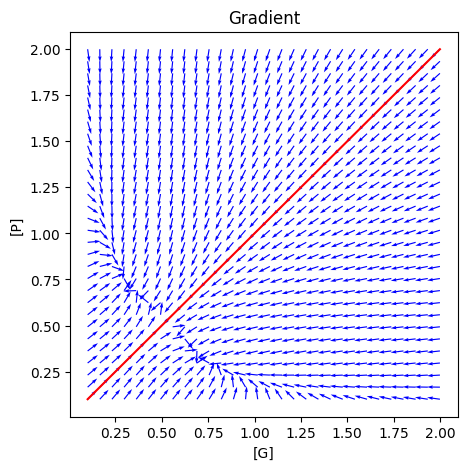

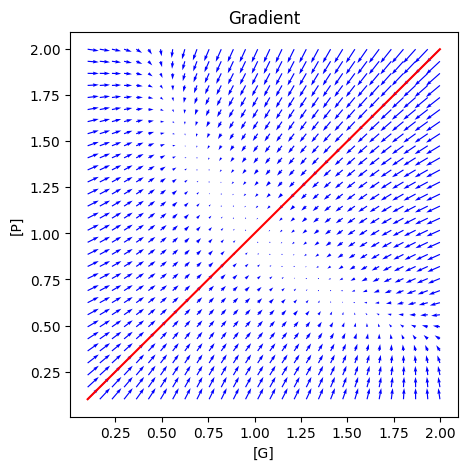

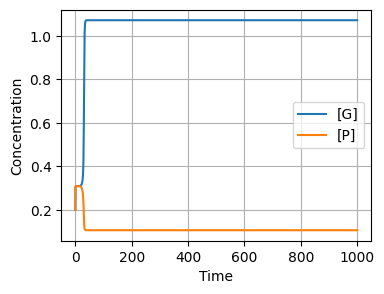

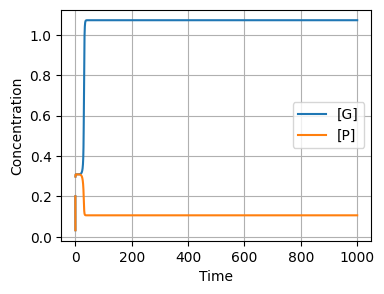

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def derivative(G, P, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

def model(y, t, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    G, P = y
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

def max_model(y, t, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    G, P = y
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return -dG_dt, -dP_dt

def max_derivative(G, P, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return -dG_dt,-dP_dt

def simple_model(y, t, n, m, a1, b1, a2, b2, k1, k2):
    G, P = y
    rand1=0
    rand2=0
    f1 = a1*G**n/(1+G**n)    #G=G/theta_a1
    f2 = a2*P**n/(1+P**n)    #P=P/theta_a2
    d1 = b1/(1+(k1*G*P)**m)  #k1=theta_a1*theta_a2/theta_b1
    d2 = b2/(1+(k2*G*P)**m)  #k2=theta_a1*theta_a2/theta_b2
    if t<850 and t>50 and int(t)%10==0:
        rand1=2e-6*(random.random()-0.5)
        rand2=2e-6*(random.random()-0.5)
    dG_dt = f1+d1-G+rand1
    dP_dt = f2+d2-P+rand2
    return dG_dt, dP_dt

def simple_der(n, m, a1, b1, a2, b2, k1, k2, G, P):
    f1 = a1*G**n/(1+G**n)    #G=G/theta_a1
    f2 = a2*P**n/(1+P**n)    #P=P/theta_a2
    d1 = b1/(1+(k1*G*P)**m)  #k1=theta_a1*theta_a2/theta_b1
    d2 = b2/(1+(k2*G*P)**m)  #k2=theta_a1*theta_a2/theta_b2
    dG_dt = f1+d1-G
    dP_dt = f2+d2-P
    return dG_dt, dP_dt

# Parameters
n=4
m=1

a1=0.6
a2=0.6

b1=1
b2=1

theta_a1=0.5
theta_a2=0.5

theta_b1=0.07
theta_b2=0.07

k1=1
k2=1

P0=0.2
G0=0.20001

G=np.linspace(0.1, 2, 30)
P=np.linspace(0.1, 2, 30)
GG, PP = np.meshgrid(G, P)

dG_dt,dP_dt=derivative(GG, PP, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2)

dist=(np.abs(dG_dt)**2+np.abs(dP_dt)**2)**0.5
dG_dt=dG_dt/dist
dP_dt=dP_dt/dist

#dG_dt_max,dP_dt_max=max_derivative(GG, PP, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2)

n=4.428571
m=4.428571
a1=0.96
a2=0.96
b1=0.96
b2=0.96
k1=0.96
k2=0.96

dG_dt_max,dP_dt_max=simple_der(n, m, a1, b1, a2, b2, k1, k2, GG, PP)


dist_max=(np.abs(dG_dt_max)**2+np.abs(dP_dt_max)**2)**0.5
#dG_dt_max=dG_dt_max/dist_max
#dP_dt_max=dP_dt_max/dist_max

plt.figure(figsize=(5,5))
plt.plot([np.min(G),np.max(G)],[np.min(P),np.max(P)],'r-')
plt.quiver(GG, PP, dG_dt, dP_dt, scale=30, scale_units=None, angles='xy', color='blue', width=0.003)
plt.xlabel('[G]')
plt.ylabel('[P]')
plt.title('Gradient')

plt.figure(figsize=(5,5))
plt.plot([np.min(G),np.max(G)],[np.min(P),np.max(P)],'r-')
plt.quiver(GG, PP, dG_dt_max, dP_dt_max, scale=30, scale_units=None, angles='xy', color='blue', width=0.003)
plt.xlabel('[G]')
plt.ylabel('[P]')
plt.title('Gradient')

# Time array
t = np.linspace(0, 1000, 10000)

# Sample initial conditions on a log scale
#initial_conditions = np.logspace(-3, 0.18, 5)  # Adjust the range as needed

# Create a list to store simulation results
#population_trajectories = []

# Perform multiple simulations with different initial conditions
#for N0 in initial_conditions:
    #N = odeint(logistic_growth_with_dilution, N0, t, args=(mu, Nm, D))
    #population_trajectories.append(N)

result = odeint(model, [G0, P0], t, args=(n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2))
max_result = odeint(max_model, [G0, P0], t, args=(n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2))

# Plot results
plt.figure(figsize=(4, 3))
plt.plot(t,result[:,0],label='[G]')
plt.plot(t,result[:,1],label='[P]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
#plt.title('')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(t,max_result[:,0],label='[G]')
plt.plot(t,max_result[:,1],label='[P]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
#plt.title('')
plt.grid(True)
plt.show()